# LASSO and Generalisation Robustness

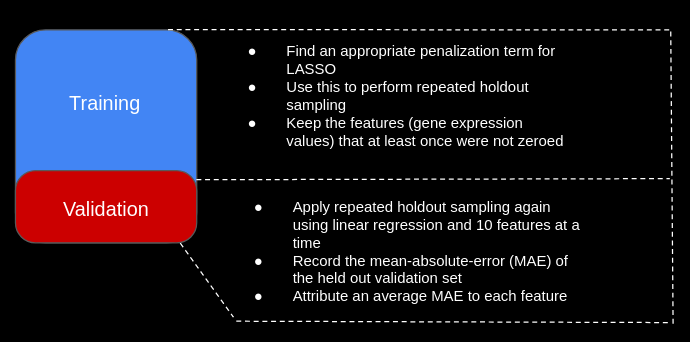

## Dataset staring point

In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
ROOT =  "../.."

In [59]:
df = pd.read_csv(ROOT + os.sep + "data/processed/all_chromosomes.csv", index_col=0)
X = df.pivot_table(index='sample.id', columns='gene', values=["gene.expression"],  aggfunc='mean')
y = df.pivot_table(index='sample.id', values=["gutted.weight.kg"],  aggfunc='mean')

In [60]:
X

gene.expression                                                      \
gene                1433b      143b2     143g1      2a5e        4f2     5nt1a   
sample.id                                                                       
F001             8.298729  10.908738  9.425202  8.779539  10.929669  7.111388   
F002             8.228803  10.642114  8.008146  8.664696   9.849611  7.783078   
F003             8.643025  10.539054  8.000962  8.201590  10.582260  7.636555   
F004             5.956833  10.835880  8.092081  8.547840   9.075364  8.207422   
F005             6.892844  11.015085  7.600201  8.461058   9.100262  7.466592   
...                   ...        ...       ...       ...        ...       ...   
F450             8.197073  10.629662  9.355759  8.723406  10.701376  7.170370   
F456             7.759628  11.055183  8.654288  9.059819   9.624544  7.364918   
F458             9.983777  11.766481  8.220540  8.019322  10.493871  7.168827   
F459             8.409117  10.899049  9.156758  8.108310   9.991265  7.827205   
F461            10.594237  11.204688  5.033837  8.015974   8.028348  8.265764   

                                                               ...            \
gene      LOC100136352 LOC100136353 LOC100136354 LOC100136364  ...     znrf3   
sample.id                                                      ...             
F001         12.583505    11.712159    10.124062     8.345641  ...  7.003478   
F002         12.492871    12.026031    11.429684     7.701277  ...  6.476335   
F003         12.700801    11.418342    10.488037     8.113418  ...  6.643837   
F004         13.283415    11.583582    11.180475     7.705314  ...  6.584228   
F005         12.768129    11.846070    10.495586     7.677500  ...  6.471823   
...                ...          ...          ...          ...  ...       ...   
F450         13.095476    11.476600    12.086811     7.735623  ...  6.948422   
F456         12.835405    11.793184    12.456062     7.485766  ...  5.033837   
F458         13.948246    11.870888    12.054974     8.744106  ...  5.033837   
F459         13.391611    11.956632    13.295898     6.904554  ...  5.033837   
F461         13.956726    11.525143    12.296248     5.033837  ...  5.033837   

                                                                       \
gene           znt4      znt6    zranb2    zswim5    zswim8     zte38   
sample.id                                                               
F001       8.489126  8.190617  7.973296  7.882944  8.636611  8.999665   
F002       7.205885  8.132349  8.658153  7.593406  7.944367  9.163664   
F003       8.579031  8.124747  8.715461  7.483913  8.381856  8.696754   
F004       6.195422  7.561927  8.849315  8.027654  8.051427  9.126017   
F005       6.701055  7.873324  8.836080  8.150358  7.853622  9.499643   
...             ...       ...       ...       ...       ...       ...   
F450       7.634688  8.306277  8.400094  7.608247  8.134562  8.630035   
F456       7.485766  6.749432  9.106140  7.485766  8.103360  7.977881   
F458       7.168827  7.375141  7.168827  7.375141  8.744106  7.051999   
F459       6.669984  6.399689  8.064149  5.999265  5.033837  7.879397   
F461       7.520792  6.127577  9.093489  5.969284  7.520792  7.298669   

                                         
gene          zufsp     zyg11     zzef1  
sample.id                                
F001       6.577016  7.471161  8.272468  
F002       6.542679  6.748560  8.465317  
F003       6.865387  7.501747  8.243687  
F004       6.565920  6.900831  8.453580  
F005       6.491205  7.128698  7.930806  
...             ...       ...       ...  
F450       6.433649  7.553774  8.322352  
F456       6.280543  7.023918  8.727422  
F458       5.033837  6.163356  7.996756  
F459       5.033837  5.999265  6.669984  
F461       6.622175  6.851348  7.711522  

[302 rows x 19409 columns]

In [61]:
y

gutted.weight.kg
sample.id                  
F001                  3.240
F002                  4.180
F003                  5.890
F004                  4.890
F005                  3.980
...                     ...
F450                  1.645
F456                  1.980
F458                  1.120
F459                  0.960
F461                  3.890

[302 rows x 1 columns]

In [62]:
!python step1_select_best_alpha_for_lasso.py

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.250e-02, tolerance: 3.514e-02
  model = cd_fast.enet_coordinate_descent(
Finished step 1


In [63]:
results_step_1 = pd.read_csv(ROOT + os.sep + "data/alpha_mae_altpheno_0_df_1.csv", index_col=0)
results_step_1
plt.scatter(x=results_step_1["alphas"], y=results_step_1["mae_list"])
plt.xlabel("Alpha")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Mean Absolute Error')

In [64]:
!python step2_lasso_feature_selection.py

Finished step 2. 78 features remain.


In [65]:
remaining_features = pd.read_csv(ROOT + os.sep + f"data/best_features_altpheno_0_1.csv", index_col=0)
remaining_features

features
0               duox
1       LOC106607151
2       LOC123739521
3       LOC123723770
4   si:ch73-330k17.3
..               ...
73               hba
74              ost4
75      LOC106596975
76      LOC106570159
77      LOC100380615

[78 rows x 1 columns]

In [71]:
!python step3_robustness_feature_selection.py

End step 3


In [72]:
result_df = pd.read_csv(ROOT + os.sep + "data/result_sorted_0_1.csv", index_col= 0)
result_df

MAE                                           Features  Update
0   0.950361  ['LOC123734193' 'LOC123739521' 'LOC106607151' ...       0
1   0.947940  ['LOC106601915' 'fel' 'LOC106596975' 'si:ch73-...       0
2   0.934200  ['LOC106583220' 'LOC106610834' 'LOC106564303' ...       0
3   0.929687  ['pim1' 'LOC106578557' 'LOC106606691' 'LOC1065...       0
4   0.929096  ['LOC106610834' 'LOC106586961' 'LOC123730955' ...       0
..       ...                                                ...     ...
95  0.835217  ['LOC123730955' 'LOC106601559' 'LOC100136455' ...       0
96  0.832240  ['gadl1' 'LOC123730955' 'LOC106610314' 'LOC106...       0
97  0.822485  ['LOC106602771' 'LOC106561261' 'LOC106601559' ...       0
98  0.807873  ['LOC106586961' 'si:ch211-106h4.4' 'afp4' 'pim...       0
99  0.790706  ['klf9' 'duox' 'LOC106596975' 'LOC106564303' '...       0

[100 rows x 3 columns]

In [73]:
!python step4_aggregate_MAEs.py

Gene LOC106564303 not covered
Gene klf9 not covered


In [74]:
result_df = pd.read_csv(ROOT + os.sep + f"data/results_ave_mae_1.csv", index_col=0)
result_df.sort_values(by="ave_MAE", inplace=True)
result_df.reset_index(drop=True, inplace=True)
result_df

Gene   ave_MAE
0            hba  0.950074
1   LOC106607380  0.950829
2   LOC106601072  0.955770
3   LOC106578021  0.957158
4           duox  0.959237
..           ...       ...
71  LOC106598467  1.010824
72  LOC106601559  1.011252
73  LOC106610834  1.011570
74  LOC106586810  1.011596
75  LOC123729671  1.013329

[76 rows x 2 columns]

Text(0.5, 0, 'Genes ordered by AAMAE')

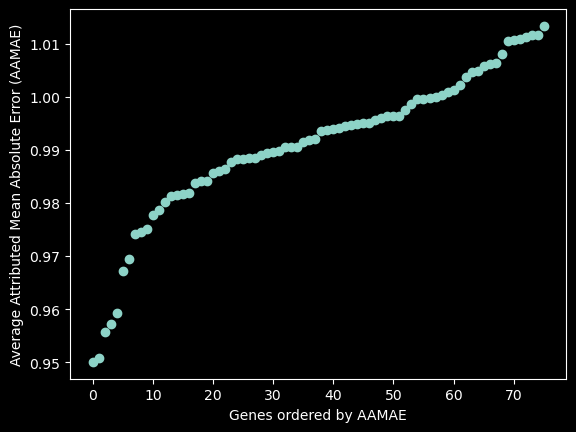

In [75]:
plt.scatter(y = result_df["ave_MAE"], x = result_df.index)
plt.ylabel("Average Attributed Mean Absolute Error (AAMAE)")
plt.xlabel("Genes ordered by AAMAE")